In [23]:
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt

## Problem 1 (5 marks)

Compute eigenvalues and eigenvectors of a matrix $A$ with the function [`scipy.linalg.eig`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.eig.html). The function returns eigenvalues as a vector and the eigenvectors as a matrix where column $i$ is the eigenvector with eignvalue in entry $i$ of the eigenvalue vector. For example, in the cell below, verify the eigenvalues and eigenectors of $A$ where

$$
A = \begin{bmatrix} 5 & 1 \\ 1 & 5 \end{bmatrix} \hspace{20mm}
\lambda_1 = 6 \ , \ \mathbf{v}_1 = \frac{1}{\sqrt{2}} \begin{bmatrix} 1 \\ 1 \end{bmatrix} \hspace{20mm}
\lambda_2 = 4 \ , \ \mathbf{v}_2 = \frac{1}{\sqrt{2}} \begin{bmatrix} 1 \\ -1 \end{bmatrix} \hspace{20mm}  
$$

Notice that eigenvalues are always returned as complex numbers. Real eigenvalues simply have 0 imaginary part which SciPy writes as `0.j`.

In [24]:
A = np.array([[5.,1.],[1.,5.]])
evals, evecs = la.eig(A)

print("Eignvalues:")
print(evals,"\n")
print("Eigenvectors:")
print(evecs)

Eignvalues:
[6.+0.j 4.+0.j] 

Eigenvectors:
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


The goal of this exercise is to compute the eigenvalues of $A_1A_1^T$ where $A_1$ is a Vandermonde matrix and then use the result to compute the condition number of $A_1$.

(a) Create the Vandermonde matrix for $t_0=0,\dots,t_5=5$ and save the result as `A1`. Recall, we use the definition of the Vandermonde matrix with values increasing from left to right.

In [27]:
##### YOUR CODE HERE
A1 = np.vander((np.arange(0, 6)), increasing = True)

(b) Compute the eigenvalues of $A_1A_1^T$. We know that the eigenvalues are real and non-negative. Use the function `np.real` to convert the values to real numbers. Save the largest eigenvalue as `lambda_max` and the smallest eigenvalue as `lambda_min`.

In [30]:
# YOUR CODE HERE
evals, evecs = la.eig(np.matmul(A1, np.transpose(A1)))
lambda_max = np.real(max(evals))
lambda_min = np.real(min(evals))

(c) The condition number of $A_1$ is given by $\mathrm{cond}(A_1) = \sqrt{\lambda_{max}/\lambda_{min}}$ where $\lambda_{max}$ and $\lambda_{min}$ are the maximum and minimum eigenvalues of $A_1A_1^T$. Compute the value $\sqrt{\lambda_{max}/\lambda_{min}}$ and save the result as `C`.

In [33]:
# YOUR CODE HERE
C = np.sqrt(lambda_max/lambda_min)

## Problem 2 (10 marks)

The data file `adjacency.csv` contains the adjacency matrix of a directed graph $G$ which represents a collection of 100 websites and the links between them.
 
The cell below reads the data from the file `adjacency.txt`, creates the adjacency matrix $A$ and stochastic matrix $P$ and plots the graph $G$ with a circular layout. The matrix $P$ represents the markov chain for the process: at each step, click a random link on the page.

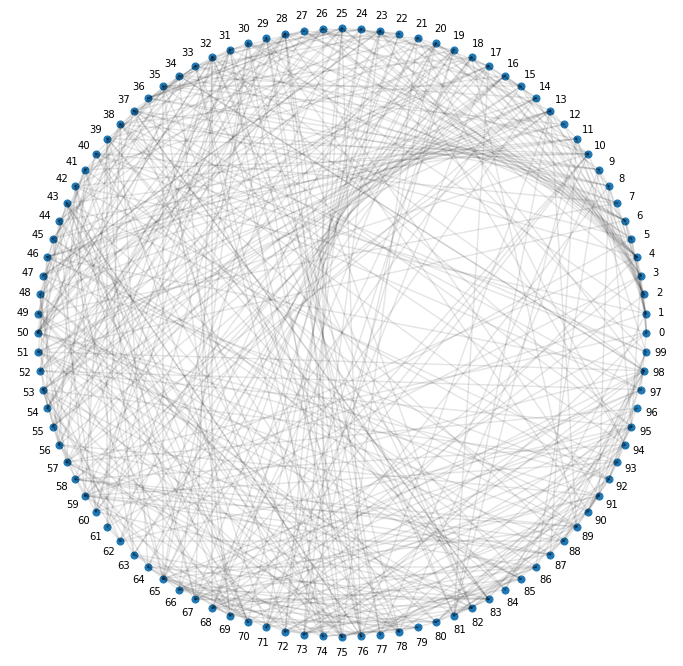

In [35]:
A = np.loadtxt('adjacency.csv',delimiter=',')
P = A/A.sum(axis=0)

def plotG(A,colors=None,figsize=(12,12)):
    N = A.shape[0]
    n = np.arange(N)
    E = np.argwhere(A > 0)
    plt.figure(figsize=figsize)
    plt.plot(np.cos(2*np.pi*E.T/N),np.sin(2*np.pi*E.T/N),'k',alpha=0.1)
    plt.scatter(np.cos(2*np.pi*n/N),np.sin(2*np.pi*n/N),c=colors,s=50,cmap='jet')
    for k in range(N):
        plt.text(1.05*np.cos(2*np.pi*k/N),1.05*np.sin(2*np.pi*k/N),k,ha='center',va='center')
    plt.axis('equal'), plt.axis(False)
    if colors is not None:
        plt.colorbar(fraction=0.02)
    plt.show()

plotG(A)

(a) Create the Google matrix $\alpha P + (1 - \alpha)\mathbf{v} \mathbf{e}^T$ for $\alpha = 0.85$ where $\mathbf{e}$ is the column vector with all ones

$$
\mathbf{e} = \begin{bmatrix} 1 \\ 1 \\ \vdots \\ 1 \end{bmatrix}
$$

and $\mathbf{v} = 0.01 \mathbf{e}$ is the uniform distribution vector for $N=100$ nodes. Save the result as `M`.

In [63]:
# YOUR CODE HERE
alpha = 0.85
e = np.ones((100,1))
v = 0.01*e
M = alpha*P + (1 - alpha)*(np.matmul(v,np.transpose(e)))

(b) The following code performs 5 iterations of the power method (without normalization) with initial vector $\mathbf{x}_0 = [1 \ 0 \ \cdots \ 0]^T$:

    iterations = 5
    xk = np.zeros(100)
    xk[0] = 1
    for k in range(0,iterations):
        xk = M @ xk
    
Copy, paste and modify the code to perform 25 iterations and use the function `numpy.argmax` to find the webpage with the highest probability in the state vector $\mathbf{x}_k$. Save the index as `webpage1`. Plot the graph with colors given by the state vector `plotG(A,colors=xk)`.

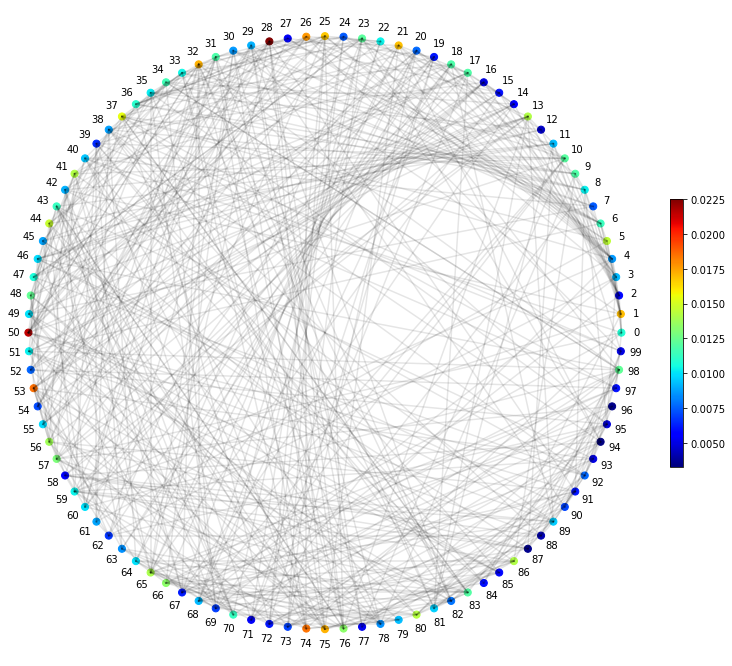

In [67]:
# YOUR CODE HERE

iterations = 25
xk = np.zeros(100)
xk[0] = 1
for k in range(0,iterations):
    xk = M @ xk
    
webpage1 = np.argmax(xk)

plotG(A,colors=xk)

(c) Let $\mathbf{v}$ be the vector where the $i$th entry is $v_i = 1/10$ for the 10 indices $i=94, 96, 87, 88, 12, 95, 16, 93, 99, 77$ and all other entries $v_j = 0$. Create the Google matrix for $\alpha = 0.9$ and the vector $\mathbf{v}$. Save the result as `M10`.

The indices included in $\mathbf{v}$ are the webpages with lowest PageRank after 25 iterations. Execute the cell below to verify. The matrix `M10` is the stochastic matrix for the process: either click a link with probability 0.9 or return to one of the low rank webpages listed in $\mathbf{v}$.

In [47]:
iterations = 25
xk = np.zeros(100)
xk[0] = 1
for k in range(0,iterations):
    xk = M@xk

np.argsort(xk)[:10]

array([94, 96, 87, 88, 12, 95, 16, 93, 99, 77])

In [73]:
# YOUR CODE HERE
alpha = 0.9

v = np.zeros((100,1))
for i in np.argsort(xk)[:10]:
    v[i] = 0.1
M10 = alpha*P + (1 - alpha)*(np.matmul(v,np.transpose(e)))

(d) Let's see if this new markov chain changes the result. Compute 10 iterations of the power method (without normalization) for `M10` starting with initial vector $\mathbf{x}_0 = [1 \ 0 \ \cdots \ 0]^T$. Use the function `numpy.argmax` to find the webpage with the highest probability in the state vector $\mathbf{x}_k$. Save the index as `webpage2`.

In [77]:
# YOUR CODE HERE

iterations = 10
xk = np.zeros(100)
xk[0] = 1
for k in range(0,iterations):
    xk = M10 @ xk

webpage2 = np.argmax(xk)

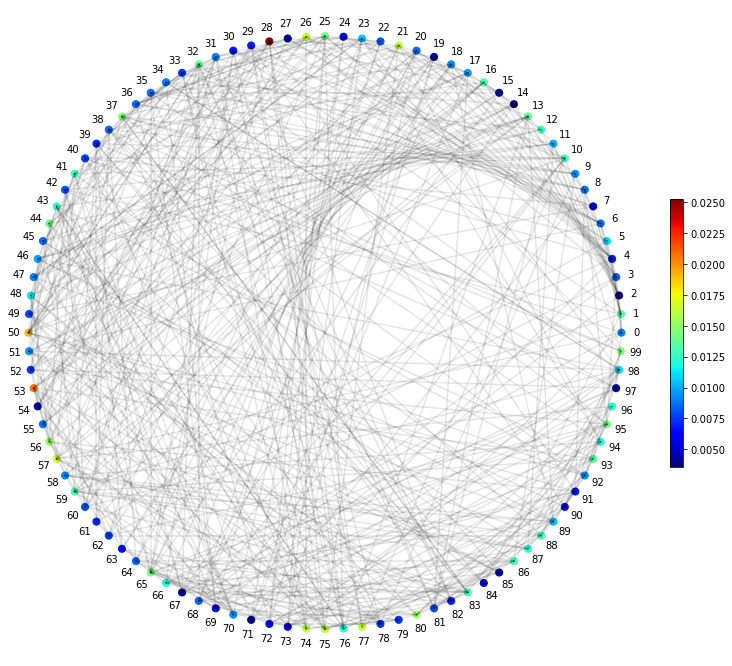

In [80]:
plotG(A,colors=xk)

## Problem 3 (5 marks)

The following code imports the digits dataset from [sklearn](https://scikit-learn.org/stable/) and selects the subset of the data correpsonding to the digit `9`.

    data = datasets.load_digits()
    X = data['data']
    y = data['target']
    X9 = X[y == 9] # This line selects the rows corresponding to 9s

Copy, paste and modify this code to find the first weight vector for the data consisting of the digit `4`. Reshape the first weight vector as a 8 by 8 matrix and save the result as `W`.

Verify your weight vector by plotting the matrix with the command:

```
plt.imshow(W,cmap='binary',interpolation='gaussian')
plt.show()
```

In [81]:
from sklearn import datasets

# YOUR CODE HERE

data = datasets.load_digits()
X = data['data']
y = data['target']
X4 = X[y == 4]

X4 = X4 - X4.mean(axis=0)

P,S,QT = la.svd(X4)

W = np.reshape(QT[0], (8,8))

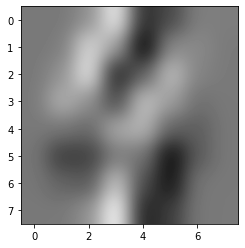

In [85]:
plt.imshow(W,cmap='binary',interpolation='gaussian')
plt.show()